In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')
pio.templates.default = "plotly_white"

In [2]:
data = pd.read_csv("credit_scoring.csv")
print(data.head())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

In [3]:
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [5]:
print(data.describe())

               Age  Credit Utilization Ratio  Payment History  \
count  1000.000000               1000.000000      1000.000000   
mean     42.702000                  0.509950      1452.814000   
std      13.266771                  0.291057       827.934146   
min      20.000000                  0.000000         0.000000   
25%      31.000000                  0.250000       763.750000   
50%      42.000000                  0.530000      1428.000000   
75%      54.000000                  0.750000      2142.000000   
max      65.000000                  1.000000      2857.000000   

       Number of Credit Accounts   Loan Amount  Interest Rate    Loan Term  
count                1000.000000  1.000000e+03    1000.000000  1000.000000  
mean                    5.580000  2.471401e+06      10.686600    37.128000  
std                     2.933634  1.387047e+06       5.479058    17.436274  
min                     1.000000  1.080000e+05       1.010000    12.000000  
25%                     3.000

In [6]:
credit_utilization_fig = px.box(data, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show(renderer='browser')

In [7]:
loan_amount_fig = px.histogram(data, x='Loan Amount', 
                               nbins=20, 
                               title='Loan Amount Distribution')
loan_amount_fig.show(renderer='browser')


In [8]:
numeric_df = data[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]
correlation_fig = px.imshow(numeric_df.corr(), 
                            title='Correlation Heatmap')
correlation_fig.show(renderer='browser')

In [9]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
data['Education Level'] = data['Education Level'].map(education_level_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
data['Credit Score'] = credit_scores


In [10]:
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


In [11]:
from sklearn.cluster import KMeans

X = data[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
data['Segment'] = kmeans.labels_

In [12]:
# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show(renderer='browser')

In [13]:
data['Segment'] = data['Segment'].map({2: 'Very Low', 
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})

# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show(renderer='browser')

In [14]:
# Now will find the wcss value for different number of cluster

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

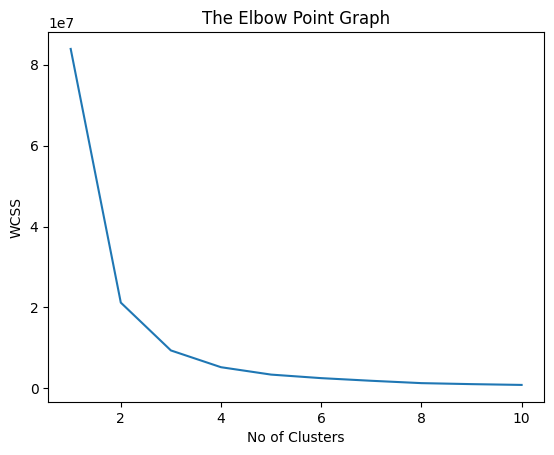

In [15]:
# Now will plot the elbow graph to select optimal value of cluster

plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()